In [1]:
!pip install ruptures

     |████████████████████████████████| 921kB 7.1MB/s 


Working of Binary segment


![](https://drive.google.com/uc?export=view&id=1Xdr3o2derS2VJcrtB0glsCiLUlUuQz0z) 

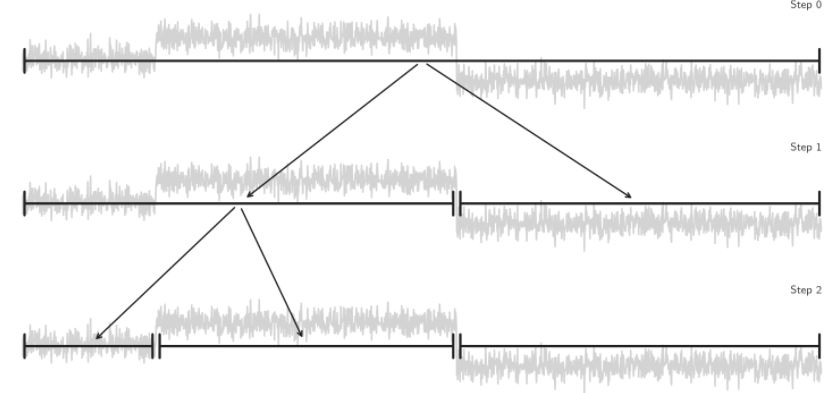

In [2]:
import numpy as np
import matplotlib.pylab as plt
import ruptures as rpt

**Case 1: Number of CPD is known (Here #= 4)**

In [3]:
n = 1500  # number of samples
n_bkps, sigma = 4, 3  # number of change points, noise standard deviation
dim=1
signal, bkps = rpt.pw_constant(n, dim, n_bkps, noise_std=sigma)

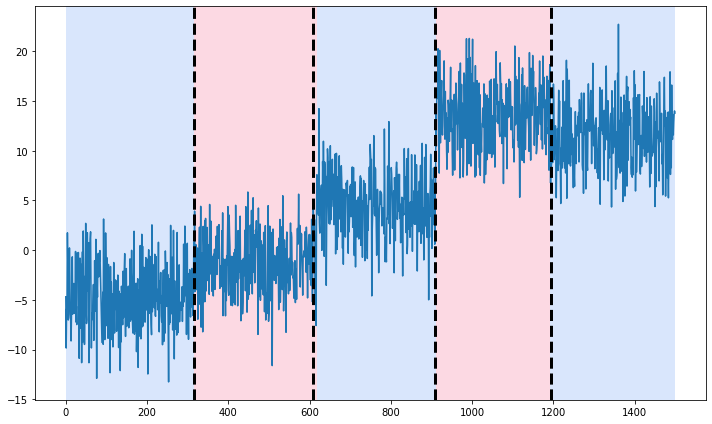

In [4]:
# change point detection
model = "rbf"  # "l1", "rbf", "linear", "normal", "ar",...
algo = rpt.Binseg(model=model).fit(signal)
my_bkps = algo.predict(n_bkps=n_bkps)

# show results
rpt.show.display(signal, bkps, my_bkps, figsize=(10, 6))
plt.show()

**Case 2: Number of CPD is unknown ***

#Giving High Penalty

In [5]:
my_bkps = algo.predict(pen=50)

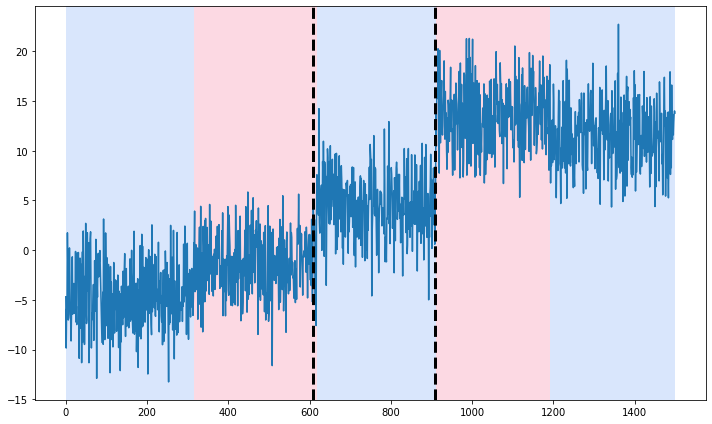

In [6]:
rpt.show.display(signal, bkps, my_bkps, figsize=(10, 6))
plt.show()

#Giving Low Penalty


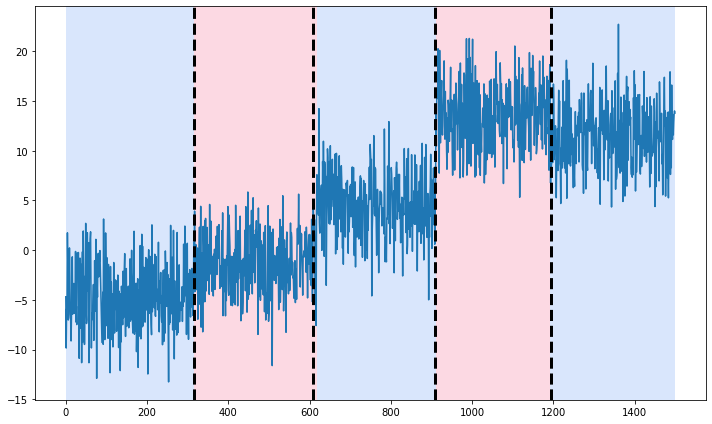

In [7]:
my_bkps = algo.predict(pen=2)
rpt.show.display(signal, bkps, my_bkps, figsize=(10, 6))
plt.show()

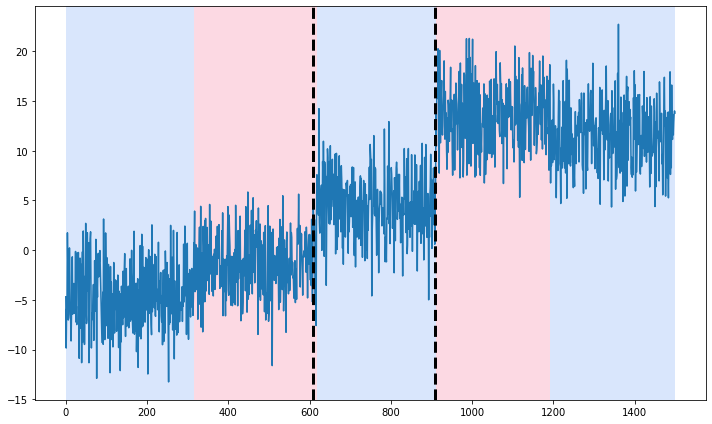

In [8]:
my_bkps = algo.predict(pen=sigma*sigma*np.log(n))
rpt.show.display(signal, bkps, my_bkps, figsize=(10, 6))
plt.show()

#Window Approximate

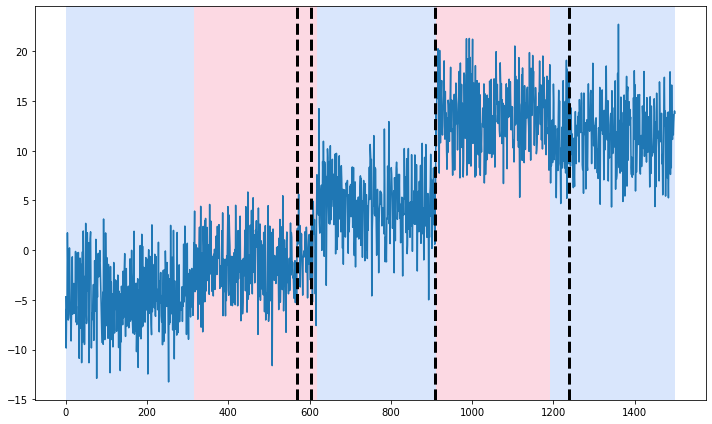

In [9]:
# change point detection
model = "normal"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Window(width=40, model=model).fit(signal)
my_bkps = algo.predict(n_bkps=n_bkps,pen = 50)
# show results
figure, axarr = rpt.show.display(signal, bkps, my_bkps, figsize=(10, 6))

#Bottom-up (known number of CPD and fixed penalty)

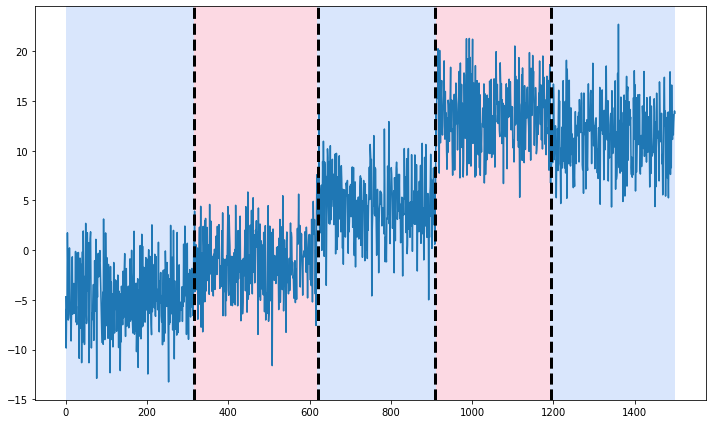

In [10]:
# change point detection
model = "l2"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.BottomUp(model=model).fit(signal)
my_bkps = algo.predict(n_bkps=n_bkps,pen = 50)
# show results
figure, axarr = rpt.show.display(signal, bkps, my_bkps, figsize=(10, 6))